# Generate Sinusoidal Data with Hourly Timestamps

This notebook generates a CSV file with sinusoidal and cosine waves with hourly timestamps, similar to the ETTh1.csv format.

In [106]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Configuration Parameters

Modify these parameters to control the data generation:

In [107]:
# Configuration parameters
num_samples = 200000  # Number of samples to generate
start_date = "2024-01-01 00:00:00"  # Starting date
output_dir = "/home/sa53869/time-series/moirai/time-moe-eval/"
filename = "synthetic_sinusoidal.csv"

print(f"Configuration:")
print(f"Number of samples: {num_samples}")
print(f"Start date: {start_date}")
print(f"Output directory: {output_dir}")
print(f"Output filename: {filename}")

Configuration:
Number of samples: 200000
Start date: 2024-01-01 00:00:00
Output directory: /home/sa53869/time-series/moirai/time-moe-eval/
Output filename: synthetic_sinusoidal.csv


## Data Generation Function

In [108]:
def generate_sinusoidal_data(num_samples, start_date, output_dir, filename):
    """
    Generate synthetic sinusoidal and cosine wave data with hourly timestamps.
    3 periods in roughly 64 samples for smoother plotting.
    Includes a third column with sine wave + random spikes/noise.
    """
    
    # Create hourly timestamps
    start_dt = pd.to_datetime(start_date)
    timestamps = [start_dt + timedelta(hours=i) for i in range(num_samples)]
    
    # Generate time array for wave calculations 
    # 3 periods in 64 samples means: 3 * 2π / 64 = 3π/32 per sample
    # For num_samples: 3 * 2π * (num_samples/64) = 6π * (num_samples/64)
    t = np.linspace(0, 6 * np.pi * (num_samples/64), num_samples)
    
    # Generate smooth sinusoidal wave
    sin_wave = 5 * np.sin(t) + 2
    
    # Generate smooth cosine wave
    cos_wave = 3 * np.cos(t) + 1.5
    
    # Generate sine wave + random spikes column
    # Spike magnitude: 2 * sine_wave_amplitude = 2 * 5 = 10
    # Probability: 0.05 (5% chance at each location)
    np.random.seed(42)  # For reproducible results
    spike_magnitude = 2 * 5  # 2x the sine wave amplitude (5)
    spike_probability = 0.05
    
    # Generate random values to determine where spikes occur
    spike_mask = np.random.random(num_samples) < spike_probability
    
    # Generate random spike directions (positive or negative)
    spike_directions = np.random.choice([-1, 1], size=num_samples)
    
    # Create the spike component: spikes where mask is True, zero elsewhere
    spike_component = np.zeros(num_samples)
    spike_component[spike_mask] = spike_magnitude * spike_directions[spike_mask]
    
    # Create the third column: sine wave + spikes
    sin_wave_with_spikes = sin_wave + spike_component
    
    print(f"Generated {np.sum(spike_mask)} spikes out of {num_samples} samples ({np.sum(spike_mask)/num_samples*100:.2f}%)")
    
    # Create DataFrame with sin, cos waves and sine+spikes column
    df = pd.DataFrame({
        'date': timestamps,
        'SIN_WAVE': sin_wave,
        'COS_WAVE': cos_wave,
        'SIN_WITH_SPIKES': sin_wave_with_spikes
    })
    
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Save to CSV
    output_path = os.path.join(output_dir, filename)
    df.to_csv(output_path, index=False)
    
    print(f"Generated {num_samples} samples of smooth sinusoidal data with spikes")
    print(f"Data saved to: {output_path}")
    print(f"Data shape: {df.shape}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Frequency: ~3 periods per 64 samples")
    print(f"Spike magnitude: ±{spike_magnitude}")
    print(f"Spike probability: {spike_probability}")
    
    return df, output_path

## Generate the Data

In [109]:
# Generate the data
print("Generating smooth sinusoidal data...")
df, output_path = generate_sinusoidal_data(
    num_samples=num_samples,
    start_date=start_date,
    output_dir=output_dir,
    filename=filename
)

# Display first few rows
print("\nFirst 10 rows of generated data:")
df.head(10)

Generating smooth sinusoidal data...
Generated 9860 spikes out of 200000 samples (4.93%)
Generated 9860 spikes out of 200000 samples (4.93%)
Generated 200000 samples of smooth sinusoidal data with spikes
Data saved to: /home/sa53869/time-series/moirai/time-moe-eval/synthetic_sinusoidal.csv
Data shape: (200000, 4)
Date range: 2024-01-01 00:00:00 to 2046-10-25 07:00:00
Frequency: ~3 periods per 64 samples
Spike magnitude: ±10
Spike probability: 0.05

First 10 rows of generated data:
Generated 200000 samples of smooth sinusoidal data with spikes
Data saved to: /home/sa53869/time-series/moirai/time-moe-eval/synthetic_sinusoidal.csv
Data shape: (200000, 4)
Date range: 2024-01-01 00:00:00 to 2046-10-25 07:00:00
Frequency: ~3 periods per 64 samples
Spike magnitude: ±10
Spike probability: 0.05

First 10 rows of generated data:


,date,SIN_WAVE,COS_WAVE,SIN_WITH_SPIKES
0,2024-01-01 00:00:00,2.000000,4.500000,2.000000
1,2024-01-01 01:00:00,3.451430,4.370820,3.451430
2,2024-01-01 02:00:00,4.777863,3.994404,4.777863
3,2024-01-01 03:00:00,5.865066,3.403170,5.865066
4,2024-01-01 04:00:00,6.619409,2.648034,6.619409
5,2024-01-01 05:00:00,6.975927,1.794029,6.975927
6,2024-01-01 06:00:00,6.903918,0.914703,6.903918
7,2024-01-01 07:00:00,6.409582,0.085783,6.409582
8,2024-01-01 08:00:00,5.535492,-0.621345,5.535492
9,2024-01-01 09:00:00,4.356925,-1.145783,4.356925


## Data Overview and Statistics

In [110]:
# Display data info
print("Data Info:")
print("=" * 30)
print(df.info())

print("\nData Statistics:")
print("=" * 30)
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             200000 non-null  datetime64[ns]
 1   SIN_WAVE         200000 non-null  float64       
 2   COS_WAVE         200000 non-null  float64       
 3   SIN_WITH_SPIKES  200000 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 6.1 MB
None

Data Statistics:


,date,SIN_WAVE,COS_WAVE,SIN_WITH_SPIKES
count,200000,200000.000000,200000.000000,200000.000000
mean,2035-05-29 15:30:00.000000768,2.000000,1.500015,2.005900
min,2024-01-01 00:00:00,-3.000000,-1.500000,-13.000000
25%,2029-09-14 07:45:00,-1.535506,-0.621295,-1.676115
50%,2035-05-29 15:30:00,2.000000,1.500024,1.998626
75%,2041-02-09 23:15:00,5.535506,3.621329,5.681965
max,2046-10-25 07:00:00,7.000000,4.500000,17.000000
std,NaN,3.535534,2.121331,4.169588


## Visualization

### Sinusoidal, Cosine Waves and Sine Wave with Random Spikes

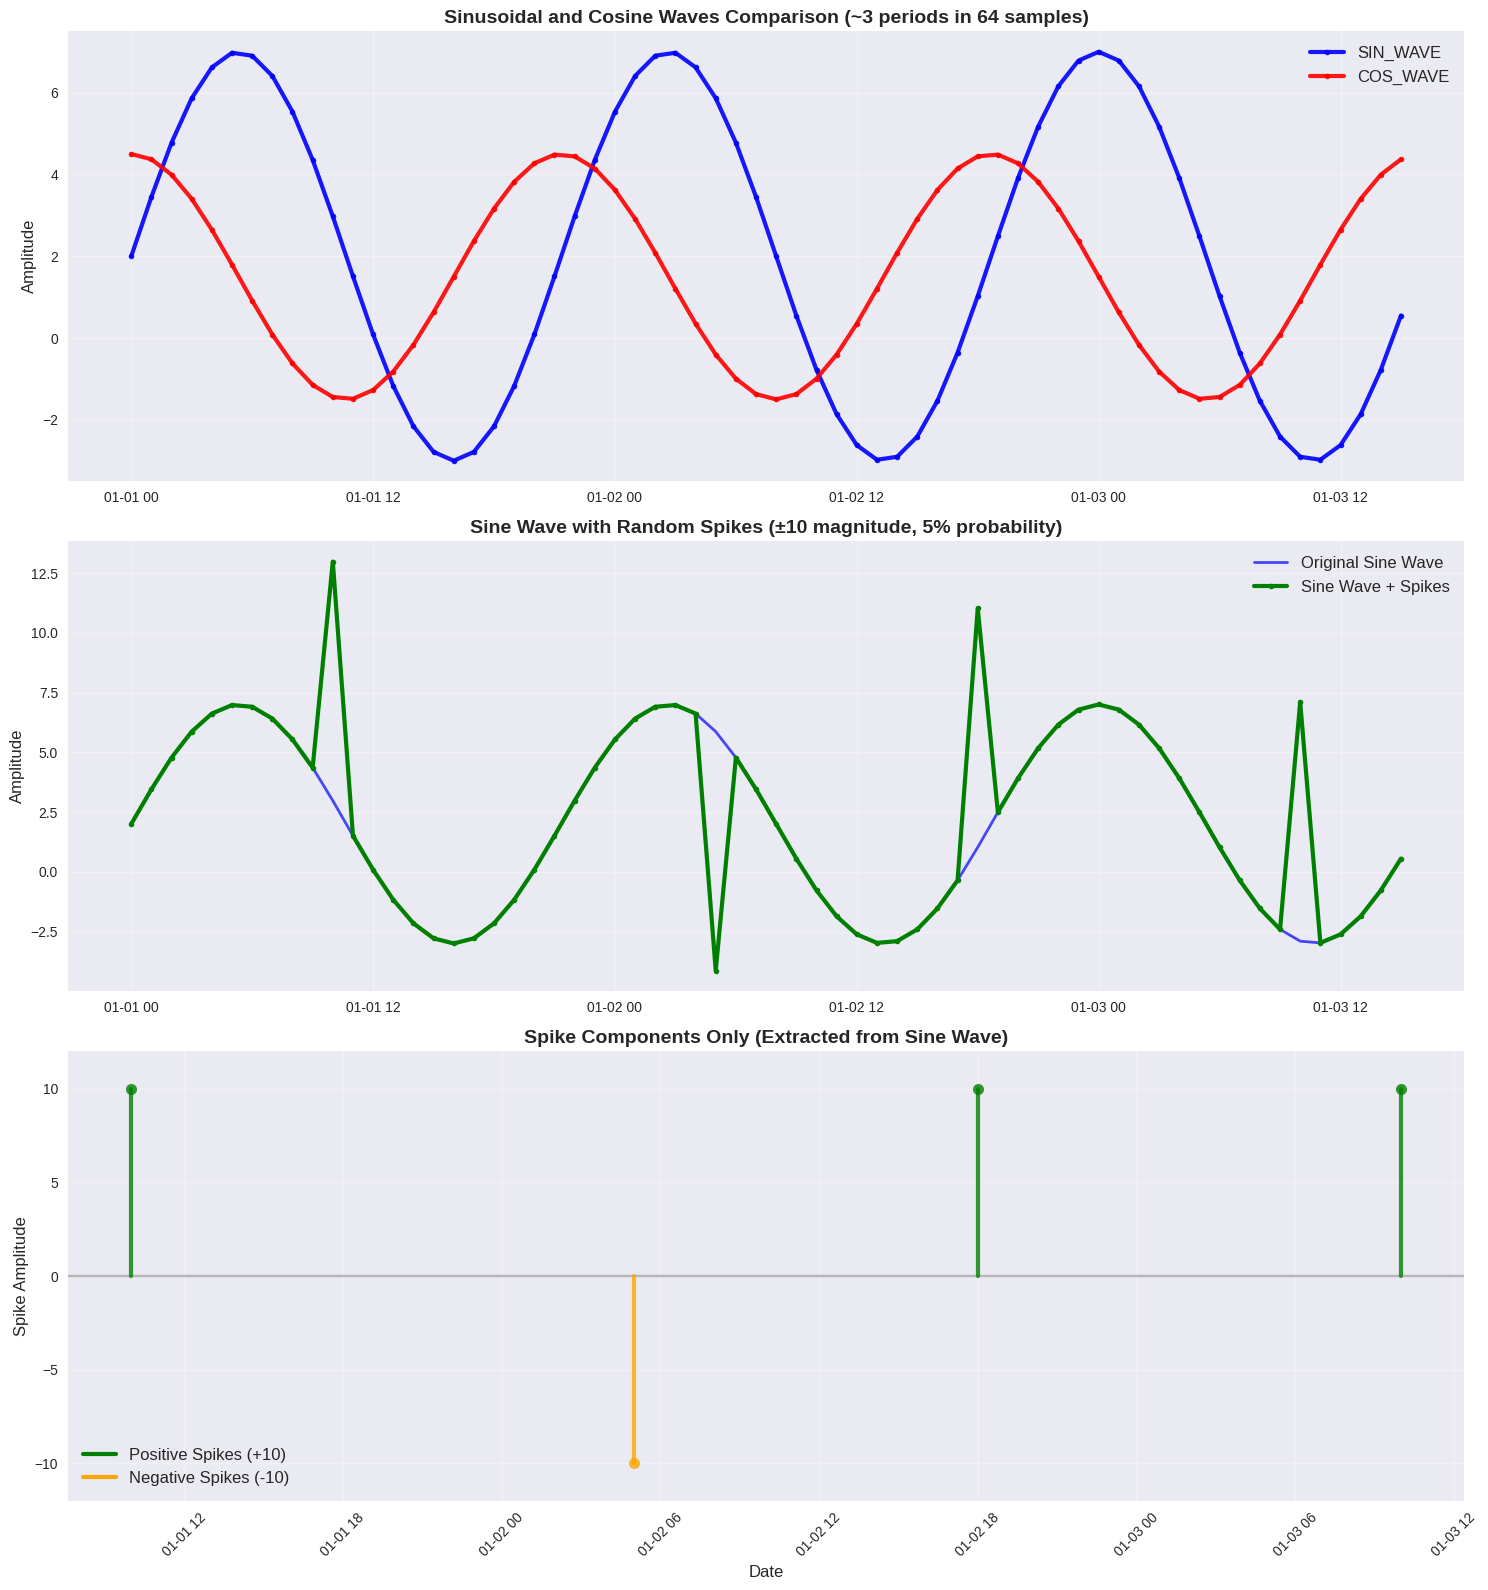


Spike Statistics in First 64 Samples:
  Total spikes: 4
  Positive spikes: 3
  Negative spikes: 1
  Spike rate: 6.25%
  Range of sine wave: [-3.00, 7.00]
  Range of sine+spikes: [-4.14, 12.98]


In [111]:
# Plot sin, cos waves and sine+spikes comparison
fig, axes = plt.subplots(3, 1, figsize=(15, 16))

# Plot first 64 samples to show ~3 complete periods
plot_samples = min(64, len(df))
plot_df = df.head(plot_samples)

# Top plot: Sin and Cos waves
wave_columns = ['SIN_WAVE', 'COS_WAVE']
colors = ['blue', 'red']

for i, (col, color) in enumerate(zip(wave_columns, colors)):
    axes[0].plot(plot_df['date'], plot_df[col], linewidth=3, label=col, color=color, alpha=0.9, marker='o', markersize=4)

axes[0].set_title('Sinusoidal and Cosine Waves Comparison (~3 periods in 64 samples)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=12)

# Middle plot: Sin wave with spikes
axes[1].plot(plot_df['date'], plot_df['SIN_WAVE'], 'b-', linewidth=2, label='Original Sine Wave', alpha=0.7)
axes[1].plot(plot_df['date'], plot_df['SIN_WITH_SPIKES'], 'g-', linewidth=3, label='Sine Wave + Spikes', marker='o', markersize=4)

axes[1].set_title('Sine Wave with Random Spikes (±10 magnitude, 5% probability)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=12)

# Bottom plot: Just the spike components for clarity
spike_component = plot_df['SIN_WITH_SPIKES'] - plot_df['SIN_WAVE']
spike_indices = plot_df[spike_component != 0].index

if len(spike_indices) > 0:
    # Plot zero line
    axes[2].axhline(y=0, color='gray', linestyle='-', alpha=0.5)
    
    # Plot spikes as vertical lines
    for idx in spike_indices:
        spike_value = spike_component.loc[idx]
        date_value = plot_df.loc[idx, 'date']
        axes[2].plot([date_value, date_value], [0, spike_value], 
                    color='green' if spike_value > 0 else 'orange', 
                    linewidth=3, alpha=0.8)
        axes[2].plot(date_value, spike_value, 'o', 
                    color='green' if spike_value > 0 else 'orange', 
                    markersize=8, alpha=0.8)

axes[2].set_title(f'Spike Components Only (Extracted from Sine Wave)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Spike Amplitude', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].set_ylim(-12, 12)  # Set limits to show spike range clearly

# Add legend for spikes
if len(spike_indices) > 0:
    axes[2].plot([], [], color='green', linewidth=3, label='Positive Spikes (+10)')
    axes[2].plot([], [], color='orange', linewidth=3, label='Negative Spikes (-10)')
    axes[2].legend(fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show statistics about spikes in the plotted range
spike_component_plot = plot_df['SIN_WITH_SPIKES'] - plot_df['SIN_WAVE']
spike_count_in_plot = np.sum(spike_component_plot != 0)
positive_spikes = np.sum(spike_component_plot > 0)
negative_spikes = np.sum(spike_component_plot < 0)

print(f"\nSpike Statistics in First {plot_samples} Samples:")
print(f"  Total spikes: {spike_count_in_plot}")
print(f"  Positive spikes: {positive_spikes}")
print(f"  Negative spikes: {negative_spikes}")
print(f"  Spike rate: {spike_count_in_plot/plot_samples*100:.2f}%")
print(f"  Range of sine wave: [{plot_df['SIN_WAVE'].min():.2f}, {plot_df['SIN_WAVE'].max():.2f}]")
print(f"  Range of sine+spikes: [{plot_df['SIN_WITH_SPIKES'].min():.2f}, {plot_df['SIN_WITH_SPIKES'].max():.2f}]")

## Final Summary

In [112]:
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"✓ Generated {num_samples} samples of smooth sinusoidal data with random spikes")
print(f"✓ Data saved to: {output_path}")
print(f"✓ Data shape: {df.shape}")
print(f"✓ Date range: {df['date'].min()} to {df['date'].max()}")
print(f"✓ Columns: {list(df.columns)}")
print("✓ Visualization: Generated waves and sine+spikes comparison displayed")

# Calculate and display spike statistics
spike_component = df['SIN_WITH_SPIKES'] - df['SIN_WAVE']
total_spikes = np.sum(spike_component != 0)
positive_spikes = np.sum(spike_component > 0)
negative_spikes = np.sum(spike_component < 0)
spike_percentage = (total_spikes / num_samples) * 100

print(f"\nSpike Statistics:")
print(f"  • Total spikes: {total_spikes:,} ({spike_percentage:.2f}%)")
print(f"  • Positive spikes (+10): {positive_spikes:,}")
print(f"  • Negative spikes (-10): {negative_spikes:,}")
print(f"  • Expected vs Actual: ~{num_samples * 0.05:.0f} vs {total_spikes}")

print(f"\nData Range Statistics:")
print(f"  • SIN_WAVE range: [{df['SIN_WAVE'].min():.2f}, {df['SIN_WAVE'].max():.2f}]")
print(f"  • COS_WAVE range: [{df['COS_WAVE'].min():.2f}, {df['COS_WAVE'].max():.2f}]")
print(f"  • SIN_WITH_SPIKES range: [{df['SIN_WITH_SPIKES'].min():.2f}, {df['SIN_WITH_SPIKES'].max():.2f}]")

print(f"\nGenerated files:")
print(f"  - CSV data: {filename}")
print("\nThe smooth sinusoidal data with random spikes is ready for analysis!")
print("• SIN_WAVE: Smooth sinusoidal wave (amplitude 5)")
print("• COS_WAVE: Smooth cosine wave (amplitude 3)")
print("• SIN_WITH_SPIKES: Sine wave + random spikes (±10 magnitude, 5% probability)")


SUMMARY
✓ Generated 200000 samples of smooth sinusoidal data with random spikes
✓ Data saved to: /home/sa53869/time-series/moirai/time-moe-eval/synthetic_sinusoidal.csv
✓ Data shape: (200000, 4)
✓ Date range: 2024-01-01 00:00:00 to 2046-10-25 07:00:00
✓ Columns: ['date', 'SIN_WAVE', 'COS_WAVE', 'SIN_WITH_SPIKES']
✓ Visualization: Generated waves and sine+spikes comparison displayed

Spike Statistics:
  • Total spikes: 9,860 (4.93%)
  • Positive spikes (+10): 4,989
  • Negative spikes (-10): 4,871
  • Expected vs Actual: ~10000 vs 9860

Data Range Statistics:
  • SIN_WAVE range: [-3.00, 7.00]
  • COS_WAVE range: [-1.50, 4.50]
  • SIN_WITH_SPIKES range: [-13.00, 17.00]

Generated files:
  - CSV data: synthetic_sinusoidal.csv

The smooth sinusoidal data with random spikes is ready for analysis!
• SIN_WAVE: Smooth sinusoidal wave (amplitude 5)
• COS_WAVE: Smooth cosine wave (amplitude 3)
• SIN_WITH_SPIKES: Sine wave + random spikes (±10 magnitude, 5% probability)
